In [39]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 

In [40]:
# Import as Dataframe
df_tc = pd.read_csv('Data_mexico.csv')
df_tc.head()

,year_tc,temperature_change
0,1961,-0.140
1,1962,0.189
2,1963,0.229
3,1964,-0.292
4,1965,-0.073


VAMOS A USAR EL MODELO ARIMA PARA SERIES DE TIEMPO

In [41]:
from statsmodels.tsa.arima_model import ARIMA

In [42]:
arima_model=ARIMA(df_tc['temperature_change'],order=(2,0,0))
model=arima_model.fit()

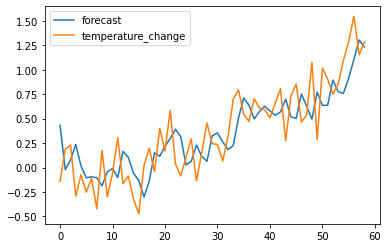

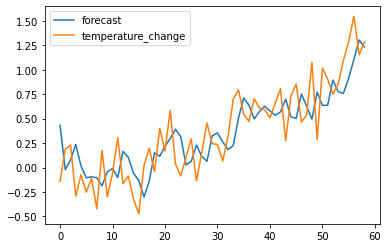

In [43]:
model.plot_predict(dynamic=False)

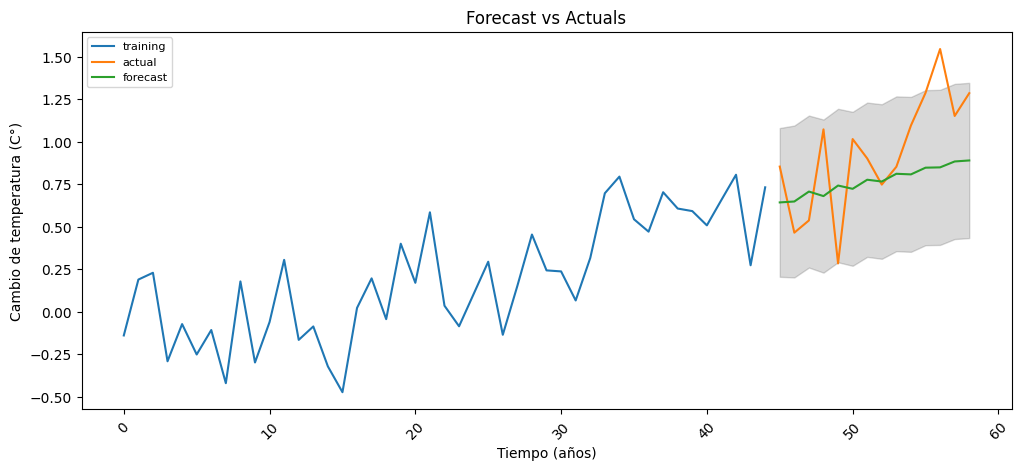

In [44]:
# Forecast
test=df_tc['temperature_change'][45:]
train=df_tc['temperature_change'][:45]
arima_model=ARIMA(train,order=(3, 1, 2))
model=arima_model.fit()

fc, se, conf = model.forecast(len(test), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.xlabel('Tiempo (años)')
plt.ylabel('Cambio de temperatura (C°)')
plt.xticks(rotation=45)
plt.show()

